# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
                                

# Display the data table for preview
mouse_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
number_of_mice = mouse_combined["Mouse ID"].nunique()
number_of_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_df = mouse_combined.drop_duplicates(subset=['Mouse ID', "Timepoint"])
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_combined.drop_duplicates(subset='Mouse ID')
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.0,0
10,a251,Infubinol,Female,21,25,0,45.0,0
20,a262,Placebo,Female,17,29,0,45.0,0
30,a275,Ceftamin,Female,20,28,0,45.0,0
40,a366,Stelasyn,Female,16,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_clean_mice = clean_mouse_df["Mouse ID"].nunique()
number_of_clean_mice

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_mean = mouse_df.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_mean

drug_median = mouse_df.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_median

drug_var = mouse_df.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_var

drug_std = mouse_df.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_std

drug_sem = mouse_df.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].sem()
drug_sem

mouse_summary = pd.DataFrame({"Tumor Mean": drug_mean,
                                 "Tumor Median": drug_median,
                                 "Tumor Variance": drug_var,
                                 "Tumor std": drug_std,
                                 "Tumor SEM": drug_sem})
mouse_summary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor std,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
(mouse_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']}))

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

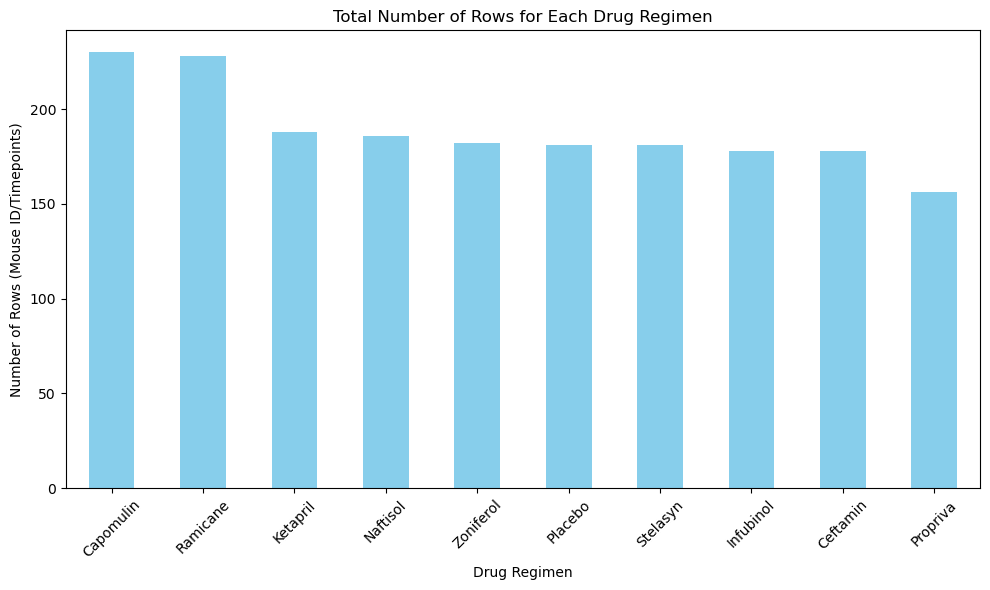

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_df['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


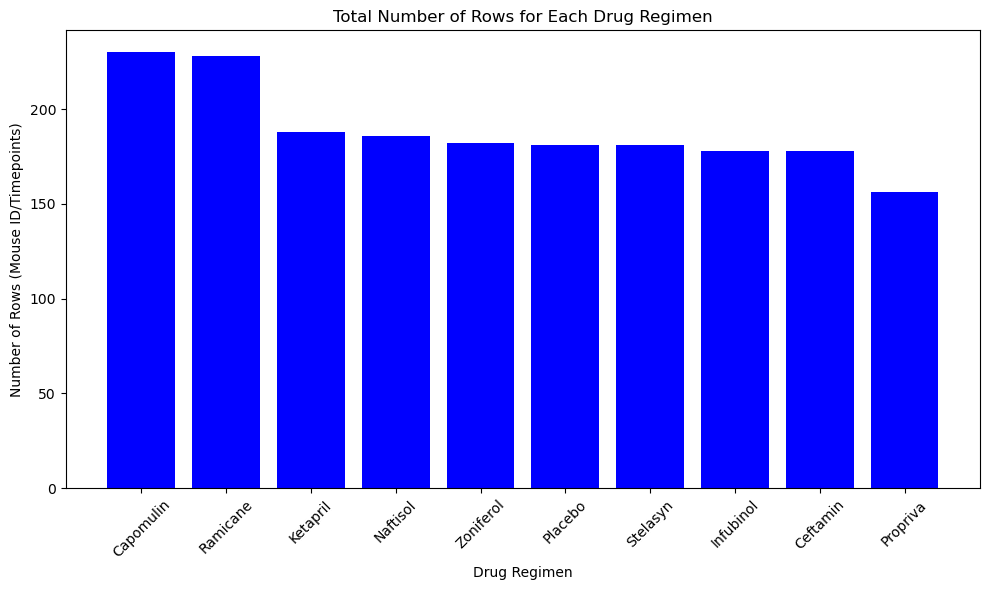

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = mouse_df['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='blue')

# Set title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Mice Used In Study'}>

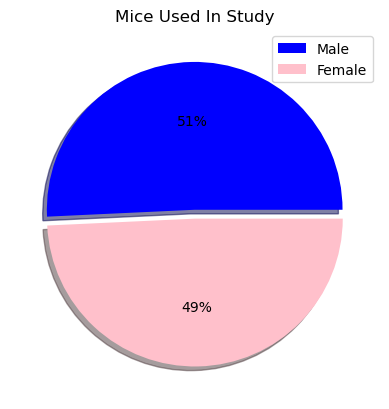

In [20]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender = mouse_df.value_counts("Sex")
gender
colors = ["blue", "pink"]
explode = (0.03, 0.03) 
legend=True
gender.plot(kind='pie', autopct='%1.0f%%', title="Mice Used In Study", colors=colors, explode=explode, 
            shadow=True, legend=True, ylabel='', labeldistance=None)


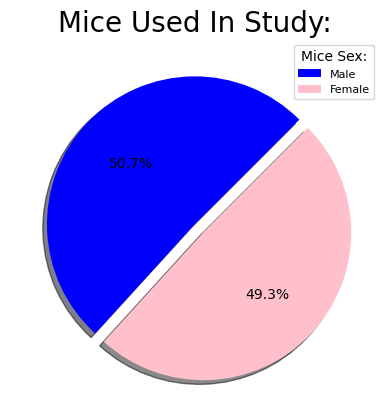

In [22]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ['Male', 'Female']
exploded = [0, 0.08]
plt.title("Mice Used In Study:", fontsize=20, color='k')
plt.pie(gender, colors=['blue', 'pink'], labels=labels, autopct='%1.1f%%', 
        shadow={'ox': -0.02, 'edgecolor': 'k', 'shade': 0.9}, startangle=45, explode=exploded, labeldistance=None)
plt.legend(title = "Mice Sex:", fontsize=8)
plt.show()


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
volume = mouse_df.groupby(["Mouse ID"])["Timepoint"].max()
volume = volume.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df = volume.merge(mouse_df, on = ["Mouse ID", "Timepoint"], how="left")
merged_mouse_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Step 3: Loop through each treatment to calculate IQR and determine outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merged_mouse_df[merged_mouse_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # Add subset to the tumor volume data list
    tumor_vol_data.append(subset)

    # Calculate the IQR
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print out the results for each treatment
    print(f"{treatment} Treatment:")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential Outliers: {subset[(subset < lower_bound) | (subset > upper_bound)]}\n")


Capomulin Treatment:
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane Treatment:
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol Treatment:
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin Treatment:
  Lower Bound: 25.355449580000002
  Upper Bound: 87.66645829999999
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_72269/1647258216.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels = treatments)


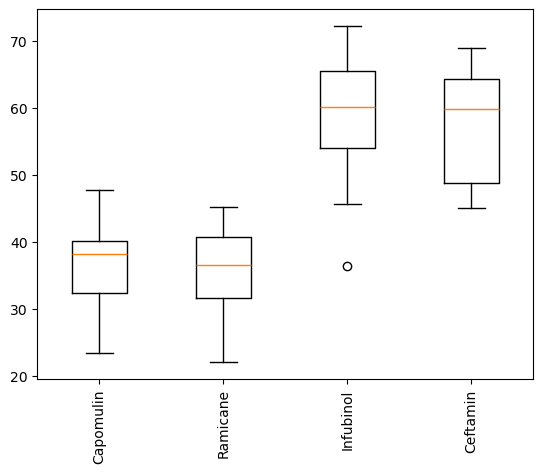

In [35]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatments)
plt.xticks(rotation=90)
plt.show()

## Line and Scatter Plots

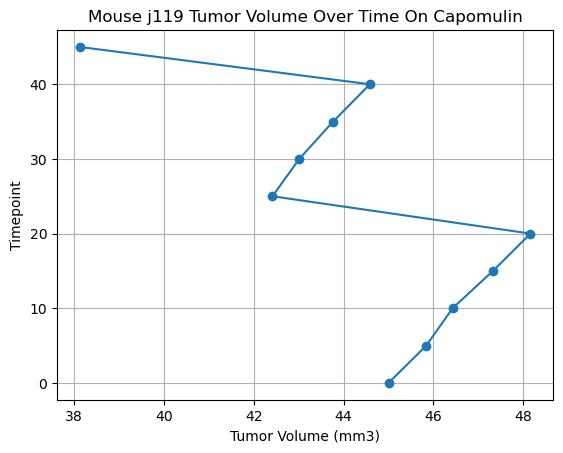

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
isolate = "Capomulin"

# Isolate just Mouse ID using Capumulin
isolated = mouse_df[mouse_df["Drug Regimen"] == isolate]
isolated["Mouse ID"].unique()
j119 = isolated.loc[(mouse_df['Mouse ID'] == "j119")]
j119_volume = j119["Tumor Volume (mm3)"]
j119_time = j119["Timepoint"]

plt.title("Mouse j119 Tumor Volume Over Time On Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.plot(j119_volume, j119_time, marker="o")
plt.grid()
plt.show()

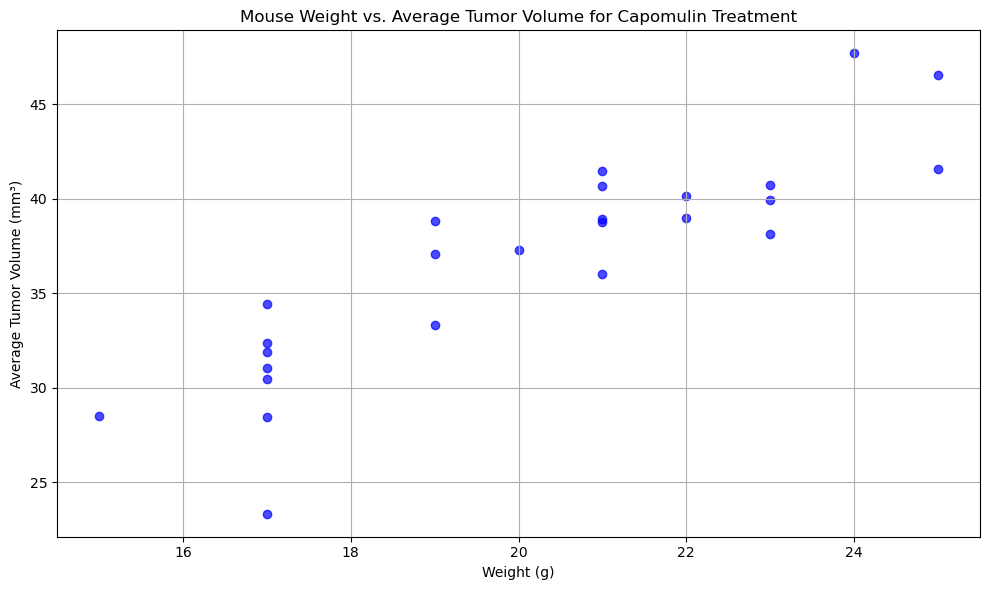

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: Filter the DataFrame for Capomulin treatment
capomulin_data = merged_mouse_df[merged_mouse_df['Drug Regimen'] == 'Capomulin']

# Step 2: Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Step 3: Merge the average tumor volume with the mouse weight data
avg_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
avg_data = pd.merge(avg_tumor_volume, avg_weight_data, on='Mouse ID')

# Step 4: Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Step 5: Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.grid()

# Step 6: Show the plot
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.876706040365812


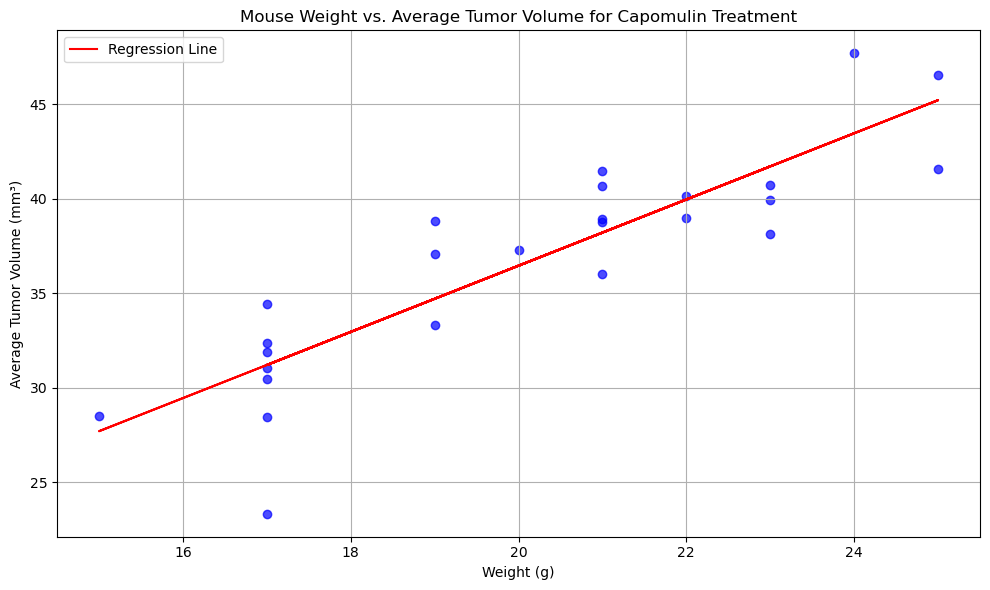

In [51]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = merged_mouse_df[merged_mouse_df['Drug Regimen'] == 'Capomulin']

# Step 2: Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Step 3: Merge the average tumor volume with the mouse weight data
avg_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
avg_data = pd.merge(avg_tumor_volume, avg_weight_data, on='Mouse ID')

# Step 4: Calculate the correlation coefficient
correlation = avg_data['Weight (g)'].corr(avg_data['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation}")

# Step 5: Perform linear regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])

# Step 6: Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Step 7: Create regression line
regression_line = slope * avg_data['Weight (g)'] + intercept
plt.plot(avg_data['Weight (g)'], regression_line, color='red', label='Regression Line')

# Step 8: Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.grid()
plt.legend()

# Step 9: Show the plot
plt.tight_layout()
plt.show()